In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from helpers import *
from RandomForest import *

Loading data...
Removing rows with less than 1000 counts...
Convert counts to frequencies...
Data loaded!
[20, 100, 200]
[5, 10, 15, 20, 35, 50]
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] max_depth=5, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=5, n_estimators=20, accuracy=0.955, eukaryote_accuracy=0.940, procaryote_accuracy=0.967, total=   3.7s
[CV] max_depth=5, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=5, n_estimators=20, accuracy=0.954, eukaryote_accuracy=0.945, procaryote_accuracy=0.961, total=   3.9s
[CV] max_depth=5, n_estimators=20 ....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.6s remaining:    0.0s


[CV]  max_depth=5, n_estimators=20, accuracy=0.957, eukaryote_accuracy=0.950, procaryote_accuracy=0.962, total=   3.6s
[CV] max_depth=5, n_estimators=20 ....................................
[CV]  max_depth=5, n_estimators=20, accuracy=0.951, eukaryote_accuracy=0.931, procaryote_accuracy=0.968, total=   3.7s
[CV] max_depth=5, n_estimators=20 ....................................
[CV]  max_depth=5, n_estimators=20, accuracy=0.949, eukaryote_accuracy=0.935, procaryote_accuracy=0.961, total=   3.5s
[CV] max_depth=5, n_estimators=100 ...................................
[CV]  max_depth=5, n_estimators=100, accuracy=0.963, eukaryote_accuracy=0.952, procaryote_accuracy=0.973, total=  18.3s
[CV] max_depth=5, n_estimators=100 ...................................
[CV]  max_depth=5, n_estimators=100, accuracy=0.963, eukaryote_accuracy=0.952, procaryote_accuracy=0.972, total=  18.7s
[CV] max_depth=5, n_estimators=100 ...................................
[CV]  max_depth=5, n_estimators=100, accuracy=0.

[CV]  max_depth=20, n_estimators=20, accuracy=0.968, eukaryote_accuracy=0.965, procaryote_accuracy=0.971, total=  11.1s
[CV] max_depth=20, n_estimators=20 ...................................
[CV]  max_depth=20, n_estimators=20, accuracy=0.971, eukaryote_accuracy=0.968, procaryote_accuracy=0.974, total=  11.3s
[CV] max_depth=20, n_estimators=20 ...................................
[CV]  max_depth=20, n_estimators=20, accuracy=0.970, eukaryote_accuracy=0.965, procaryote_accuracy=0.974, total=  10.8s
[CV] max_depth=20, n_estimators=20 ...................................
[CV]  max_depth=20, n_estimators=20, accuracy=0.971, eukaryote_accuracy=0.961, procaryote_accuracy=0.980, total=  11.3s
[CV] max_depth=20, n_estimators=20 ...................................
[CV]  max_depth=20, n_estimators=20, accuracy=0.973, eukaryote_accuracy=0.965, procaryote_accuracy=0.979, total=  11.2s
[CV] max_depth=20, n_estimators=100 ..................................
[CV]  max_depth=20, n_estimators=100, accurac

[CV]  max_depth=50, n_estimators=200, accuracy=0.984, eukaryote_accuracy=0.977, procaryote_accuracy=0.989, total= 2.2min
[CV] max_depth=50, n_estimators=200 ..................................
[CV]  max_depth=50, n_estimators=200, accuracy=0.984, eukaryote_accuracy=0.981, procaryote_accuracy=0.987, total= 2.2min


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 78.9min finished


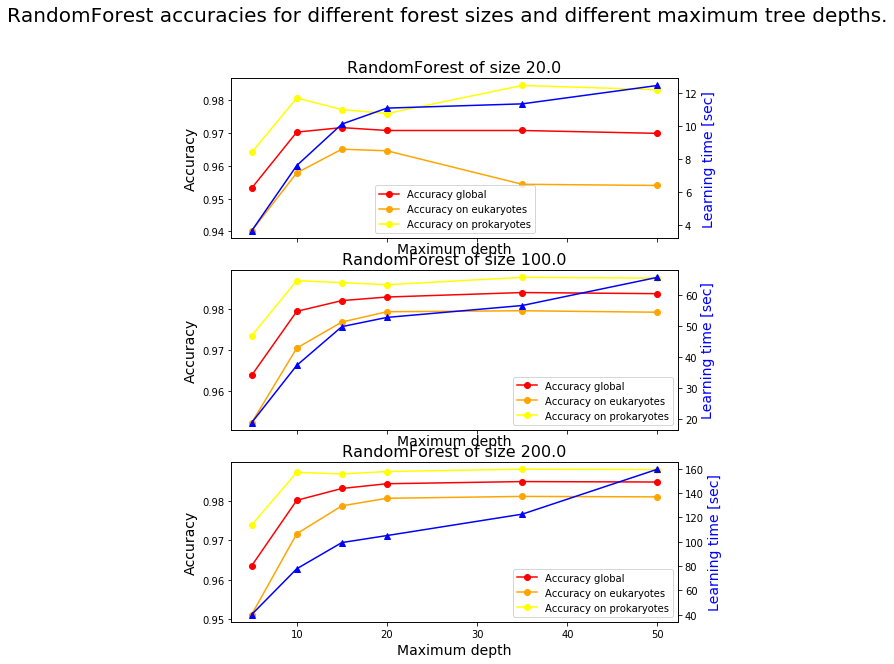

In [2]:
# global param
seed = 42
n_jobs= None
y, X, ids = load_csv_data("Counts_n10000_k5_s5000.csv")

df = grid_search_RF(X, y, seed, n_jobs, cv=5, verbose=3)

First observation is that the estimator has quite bad results for a forest size 20, while for sizes of 100 and 200, the accuracies are very satisfying : arround 98%.

Notice also that for sizes 100 and 200, we basically get the same accuracy results/curves. A noticable difference is that the bigger forest takes way more time to learn than the smaller one, while giving approximately the same accuracies. It seems reasonable to choose a size of `n = 100` in this case.

Finally, the accuracy stays approximately constant for a maximum depth bigger than 20. As the learning time increases with the maximum depth, the best choice of the depth is `d=20`.

In [5]:
# manually choose the best tradeoff
n = 100
d = 20
df.loc[df['n_estimators'] == n][df['max_depth'] == d]

/Users/anita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,n_estimators,max_depth,accuracy,procaryote accuracy,eukaryote accuracy,learning time
10,100.0,20.0,0.982894,0.985891,0.979311,52.845425


Remains to do :
- [ ] n_estimators and max_depths to ints (i.e. handle the None case) 